# F-строки

Иногда у нас возникает потребность в конструированиии строк из других переменных, например:

In [1]:
name = "Василий"
age = 46
print("Меня зовут " + name + ". Мне " + str(age) + " лет.")

Меня зовут Василий. Мне 46 лет.


Однако предложенный выше способ крайне громоздкий и сложночитаемый. Кроме того, он не эффективен по производительности.

Более простое и элегантное решение: f-строки

In [2]:
print(f"Меня зовут {name}. Мне {age} лет.")

Меня зовут Василий. Мне 46 лет.


Мы пишем обычную строку, перед которой ставим символ "f", а внутри строки, в фигурных скобках, пишем имя переменной, которую хотим добавить в строку на это место

Если нам внезапно потребуется использовать внутри f-строки символы фигурных скобок, то просто пишем их дважды:

In [3]:
print(f'Я всё ещё {name}, вот вам фигурная скобка: {{')
print(f'И ещё одна: }}')
print(f'И сразу две: {{}}')

Я всё ещё Василий, вот вам фигурная скобка: {
И ещё одна: }
И сразу две: {}


f-строки могут быть удобны для того, чтобы менять выводимый текст в цикле:

In [4]:
for i in range(0, 10):
    print(f'{2} в {i}-ой степени равняется {2 ** i}')

2 в 0-ой степени равняется 1
2 в 1-ой степени равняется 2
2 в 2-ой степени равняется 4
2 в 3-ой степени равняется 8
2 в 4-ой степени равняется 16
2 в 5-ой степени равняется 32
2 в 6-ой степени равняется 64
2 в 7-ой степени равняется 128
2 в 8-ой степени равняется 256
2 в 9-ой степени равняется 512


# Списковые включения (List comprehension)

Иногда нам потребуется создавать списки или словари, с элементами, заданными по одному и тому же правилу — например список имён колонок, отличающихся только номером:

Мы можем это сделать следующим образом:

In [5]:
columns = []                    # Создаём пустой список columns,
for i in range(1, 6):           # а затем в цикле от 1 до 6 (не включая 6)
    columns.append(f'D{i}')     # добавляем в конец списка columns, строки с текстом 'D1', 'D2', ...,  'D5'.

print(columns)

['D1', 'D2', 'D3', 'D4', 'D5']


Однако на создание простого списка, мы потратили целых три строки. Это длинно и неудобно.

Куда более простой способ создавать списки по правилам: Списковые включения (list comprehensions)!

In [6]:
columns = [f'D{i}' for i in range(1, 6)]
print(columns)

['D1', 'D2', 'D3', 'D4', 'D5']


Как мы видим, результат точно такой же, как и при использования цикла и метода append, но кода мы написали меньше.

С помощью включений мы можем создавать и словари:

In [7]:
# Словарь, где в качестве ключей выступают степени
# А в качестве значений — два, возведённая в конкретную степень:

{i: 2**i for i in range(10)}    

{0: 1, 1: 2, 2: 4, 3: 8, 4: 16, 5: 32, 6: 64, 7: 128, 8: 256, 9: 512}

Или мы можем применять условия к добавляемым элементам:

In [8]:
# Список только чётных элементов от 0 до 10:

[i for i in range(11) if i % 2 == 0]

[0, 2, 4, 6, 8, 10]

# Группировка данных

Подключаем библиотеки для работы с таблицами и графиками соответственно:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

Считываем новую таблицу по ссылке и сохраняем её в переменную df:

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/mikewellmeansme/biological-statistics-course/master/data/002.csv')

Смотрим на имеющиеся данные:

In [11]:
df.head()

,Year,№,D1,CWT1,D2,CWT2,D3,CWT3,D4,CWT4,D5,CWT5
0,1900,1,29.732192,1.978620,30.939511,2.380663,52.044985,2.718184,50.164903,2.054598,43.016125,2.584435
1,1900,2,34.759909,2.044564,45.206381,2.415747,38.693274,2.553285,42.980751,2.126673,58.212753,2.488130
2,1900,3,33.963835,2.127454,40.888162,2.517027,52.128155,2.242873,37.238511,2.169035,53.150593,2.397679
3,1900,4,34.589675,2.054913,39.816332,2.356675,35.326948,2.497427,39.923438,1.855345,46.979475,2.324768
4,1900,5,39.908020,2.084306,45.551745,2.088117,42.807431,2.338421,48.159986,2.032776,45.456906,2.422898


Добавляем колонки средних диаметра и толщины клеточной стенки (вместо того, чтобы писать все имена колонок, просто пишем списковое включение на основе f-строк):

In [12]:
df['Dmean'] = df[[f'D{i}' for i in range(1, 6)]].mean(axis=1)
df['CWTmean'] = df[[f'CWT{i}' for i in range(1, 6)]].mean(axis=1)

In [13]:
df.head()

,Year,№,D1,CWT1,D2,CWT2,D3,CWT3,D4,CWT4,D5,CWT5,Dmean,CWTmean
0,1900,1,29.732192,1.978620,30.939511,2.380663,52.044985,2.718184,50.164903,2.054598,43.016125,2.584435,41.179543,2.343300
1,1900,2,34.759909,2.044564,45.206381,2.415747,38.693274,2.553285,42.980751,2.126673,58.212753,2.488130,43.970614,2.325680
2,1900,3,33.963835,2.127454,40.888162,2.517027,52.128155,2.242873,37.238511,2.169035,53.150593,2.397679,43.473851,2.290813
3,1900,4,34.589675,2.054913,39.816332,2.356675,35.326948,2.497427,39.923438,1.855345,46.979475,2.324768,39.327174,2.217826
4,1900,5,39.908020,2.084306,45.551745,2.088117,42.807431,2.338421,48.159986,2.032776,45.456906,2.422898,44.376818,2.193304


Далее по ходу работы нам не потребуются индивидуальные измерения. Отбросим их:

In [14]:
df = df.drop(columns=[f'D{i}' for i in range(1, 6)])
df = df.drop(columns=[f'CWT{i}' for i in range(1, 6)])

Теперь наша таблица стала чище:

In [15]:
df.head()

,Year,№,Dmean,CWTmean
0,1900,1,41.179543,2.343300
1,1900,2,43.970614,2.325680
2,1900,3,43.473851,2.290813
3,1900,4,39.327174,2.217826
4,1900,5,44.376818,2.193304


Чтобы сгруппировать данные, прибегнем к методу "groupby":

In [16]:
df.groupby('Year')

Видим, что у нас вывелась информация об объекте групп, лежащем в памяти по адресу — нас это не интересует

Мы сгруппировали данные, но ничего с ними не делали.

Предположим, мы хотим найти максимальный элемент в каждом году:

In [17]:
df.groupby('Year').max()

,№,Dmean,CWTmean
Year,,,
1900,25,45.675826,3.321200
1901,59,48.852504,3.490298
1902,37,45.551206,4.679759
1903,39,43.509881,4.714577
1904,64,39.215885,4.736352
...,...,...,...
1996,36,46.025063,4.497044
1997,8,42.359593,2.403692
1998,26,38.210444,3.390793


Видим, что после группировки у нас немного поплыла индикация.

Давайте вернём её в норму:

In [18]:
df.groupby('Year').max().reset_index()

,Year,№,Dmean,CWTmean
0,1900,25,45.675826,3.321200
1,1901,59,48.852504,3.490298
2,1902,37,45.551206,4.679759
3,1903,39,43.509881,4.714577
4,1904,64,39.215885,4.736352
...,...,...,...,...
96,1996,36,46.025063,4.497044
97,1997,8,42.359593,2.403692
98,1998,26,38.210444,3.390793
99,1999,17,39.579784,3.789398


И сохраним новую таблицу под новым именем:

In [19]:
grouped_data = df.groupby('Year').max().reset_index()

In [20]:
grouped_data.head()

,Year,№,Dmean,CWTmean
0,1900,25,45.675826,3.321200
1,1901,59,48.852504,3.490298
2,1902,37,45.551206,4.679759
3,1903,39,43.509881,4.714577
4,1904,64,39.215885,4.736352


Однако, теперь у нас неподходяще названы колонки, поскольку у нас больше не средние значения, а максимальные. А колонка "№" и вовсе показывает число клеток в году.

In [21]:
grouped_data = grouped_data.rename(columns={'№':'Cells', 'Dmean': 'Dmax', 'CWTmean': 'CWTmax'})

In [22]:
grouped_data.head()

,Year,Cells,Dmax,CWTmax
0,1900,25,45.675826,3.321200
1,1901,59,48.852504,3.490298
2,1902,37,45.551206,4.679759
3,1903,39,43.509881,4.714577
4,1904,64,39.215885,4.736352


Теперь, когда имена соответствуют колонкам, давайте добавим новую колонку — TRW (Tree Ring Width — Ширина Годичного Кольца (ШГК))

Как можно понять из названия, TRW складывается из всех элементов, составляющих годичное кольцо. То есть, из диаметров всех клеток и двойной клеточной стенки всех клеток (у каждой клетки же две стенки).

Для этого давайте сначала найдём сумму всех элементов в каждом году и схохраним во временную таблицу:

In [23]:
temp = df.groupby('Year').sum().reset_index()

In [24]:
temp.head()

,Year,№,Dmean,CWTmean
0,1900,325,868.245102,61.232673
1,1901,1770,1788.240298,142.288486
2,1902,703,1242.799926,103.708730
3,1903,780,1212.895952,104.602083
4,1904,2080,1717.449835,163.077161


А теперь в нашу основную таблицу добавим колонку TRW:

In [25]:
grouped_data['TRW'] = temp['Dmean']

Посмотрим на получившуюся таблицу:

In [26]:
grouped_data.head()

,Year,Cells,Dmax,CWTmax,TRW
0,1900,25,45.675826,3.321200,868.245102
1,1901,59,48.852504,3.490298,1788.240298
2,1902,37,45.551206,4.679759,1242.799926
3,1903,39,43.509881,4.714577,1212.895952
4,1904,64,39.215885,4.736352,1717.449835


Даже сохраним её, на будущее (не забудьте, что работая в Google Colab у вас не будет папки `data`, уберите её из пути):

In [27]:
grouped_data.to_csv('data/grouped_002.csv', index=False)

# Созависимость величин

Теперь, когда у нас есть агррегированные данные по годам, нам бы хотелось найти какие-нибудь зависимости в наших данных.

Например проверить, как ширина годичного кольца зависит от числа клеток в году.

Чтобы проверить это, для начала, можем просто построить диаграмму рассеяния для этих двух велечин:

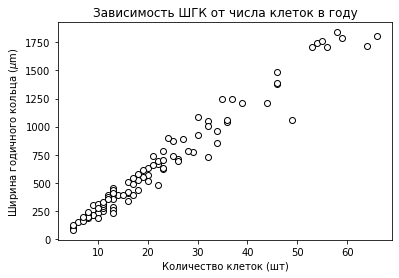

In [28]:
plt.scatter(
    grouped_data['Cells'],
    grouped_data['TRW'],
    color='white',
    edgecolor='black'
)
plt.xlabel('Количество клеток (шт)')
plt.ylabel('Ширина годичного кольца ($\mu$m)')
plt.title('Зависимость ШГК от числа клеток в году')
plt.show()

Мы видим, что чем больше число клеток, тем больше ШГК. Можно даже сказать, что зависимость линейная. Однако как нам выразить конкретным числом, а не абстрактным пониманием?

## Ковариация ($cov$)

Ковариация — парный аналог дисперсии. Но если в дисперсии мы считали "отклонение от среднего", то в ковариациимы смотрим насколько изменения в одной величине ведут к изменениям в другой.

Формула для ковариации двух величин $X$ и $Y$ одинаковой длины $n$ выглядит следующим образом:

$$cov(X, Y) = \frac{(X - X_{mean}) \cdot (Y - Y_{mean})}{n-1}$$

Где символ "$\cdot$" обозначает скалярное произведение двух векторов (то есть — сумма попарных произведений элементов векторов).

Когда соответствующие элементы обоих векторов (колонок) $X$ и $Y$ одновременно выше или ниже своих средних, то в сумму входит положительное число.

Когда один из них находится выше среднего, а другой ниже, то в сумму входит отрицательное число.

Следовательно, "большая" положительная ковариация означает, что $X$ стремится принимать большие значения при больших $Y$, и малые значения при малых $Y$. 

"Большая" отрицательная ковариация означает обратное — $X$ стремится принимать малые значения при большом $Y$ и наоборот.

Ковариация близкая к нулю означает, что такой связи не существует.

Посчитать это можно при помощи формулы:

In [29]:
def cov(x, y):
    return ((x - x.mean()) * (y - y.mean())).sum() / (len(x) - 1 )

cov(grouped_data['TRW'], grouped_data['Cells'])

6799.7271876442

Или используя встроенный метод DataFrame'ов `cov()`:

In [30]:
grouped_data[['Cells', 'TRW']].cov()

,Cells,TRW
Cells,223.018416,6799.727188
TRW,6799.727188,215305.137092


Нетрудно убедиться, что и формула и метод дают идентичные результаты.

Однако возникает две проблемы:

* Единицами измерения ковариации являются произведения единиц входящих переменных (в нашем случае это количество клеток в штуках и ШГК в микронах), которые трудно понять — что такое "Штука в микрон"?

* Если бы ШГК было в два раза больше (но число клеток в году то же), то ковариация была бы в два раза больше. Однако, в некотором смысле, степень взаимосвязи между величинамы осталась бы той же самой. Говоря иначе, трудно определить, что считать "большой" ковариацией. 

## Корреляция ($R$)

Из-за перечисленных выше проблем, чаще всего прибегают к корреляции, в которой ковариация делится на произведение стандартных отклонений отдельных переменных:

$$ R(X, Y) = \frac{cov(X,Y)}{std(X)std(Y)}$$

Корреляция является безразмерной и лежит в диапазоне от $-1$ (идеальная антикорреляция) до $1$ (идеальная корреляция)

Посчитать корреляцию, можно с помощью функции:

In [31]:
def corr(x, y):
    return cov(x, y) / (x.std() * y.std())

corr(grouped_data['TRW'], grouped_data['Cells'])

0.9812822189101577

Либо, используя встроенный метод `corr()`:

In [32]:
grouped_data[['Cells', 'TRW']].corr()

,Cells,TRW
Cells,1.000000,0.981282
TRW,0.981282,1.000000


Мы видим, что корреляция между числом клеток в году и ШГК у нас больше $0.98$, то есть, очень близка к единице, то есть можно сказать, что корреляция "очень высока".

Однако что именно означает "очень высокая корреляция"?

Насколько корреляция $0.7$ лучше корреляции $0.5$?

В какой момент корреляция начинает быть высокой?

Эти и другие вопросы мы рассмотрим на следующих семинарах.